In [1]:
#matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import xlrd
import os
from pandas import DataFrame 
from pandas import Series  
print("导入成功")

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


# 导入数据集
data = pd.read_excel('C:\\Users\\Lenovo\\Desktop\\培训题1\\附件1.xlsx')
#后期去除了完全平滑的情况，8，35，48
newdata=pd.read_excel('C:\\Users\\Lenovo\\Desktop\\培训题1\\new附件1.xlsx')
print(data.shape)
data.head()

导入成功
(5519, 102)


,时刻编号\n(Time number),传感器编号\n (Sensor number)\n 时刻 (Time),1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,1,00:00:15,9.852378,211.773888,34.280285,3.420952,7.681146,3.840573,10.908712,11.7047,...,8.133741,14.951360,3.840573,201.730173,17.240383,247.751242,8.946132,5.615367,27.678858,53.0
1,2,00:00:30,9.852378,211.773888,34.609880,1.759244,7.681146,3.840573,10.908712,11.7047,...,5.773500,6.150462,3.840573,201.730173,11.761492,247.751242,7.284424,5.615367,27.678858,53.0
2,3,00:00:45,9.852378,211.773888,34.712214,2.174671,7.681146,3.840573,10.908712,11.7047,...,6.390486,3.180928,3.840573,201.730173,10.908712,247.751242,6.730521,5.615367,27.678858,53.0
3,4,00:01:00,9.852378,211.773888,35.040086,8.410692,7.681146,3.840573,10.908712,11.7047,...,15.363709,6.030450,3.840573,201.730173,10.908712,247.751242,7.284424,5.615367,27.678858,53.0
4,5,00:01:15,10.290884,211.773888,35.040086,7.141332,7.681146,3.840573,10.908712,11.7047,...,13.568142,14.762110,3.840573,201.730173,10.908712,247.751242,8.946132,5.615367,27.678858,53.0


In [16]:
#pd.set_option('float_format', '{:f}'.format)
data.describe()

,时刻编号\n(Time number),1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,...,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000
mean,2760.000000,8.603696,213.311844,34.320667,5.981655,7.681146,4.009402,13.736526,11.704700,20.277740,...,12.519689,20.292276,3.914214,201.397964,15.126783,256.595705,7.654706,5.586747,27.075353,53.000000
std,1593.342399,1.280318,1.723757,0.762338,2.967489,0.000000,0.520752,3.247860,0.000000,1.305834,...,4.315115,9.329192,0.353975,2.606218,4.918456,5.871394,0.959453,0.223574,2.197633,0.000000
min,1.000000,3.882538,210.018895,31.695792,-9.955797,7.681146,3.840573,10.908712,11.704700,11.704700,...,-11.077450,-13.870042,3.840573,10.908712,10.908712,246.873745,4.062556,3.840573,22.413879,53.000000
25%,1380.500000,7.779859,211.773888,33.794173,6.953621,7.681146,3.840573,10.908712,11.704700,20.479664,...,12.704977,13.988954,3.840573,201.074429,10.908712,247.751242,7.001318,5.615367,25.046368,53.000000
50%,2760.000000,9.295398,213.528881,34.318768,7.141332,7.681146,3.840573,10.908712,11.704700,20.479664,...,14.383609,23.676865,3.840573,201.730173,17.466151,260.036192,8.129125,5.615367,27.678858,53.000000
75%,4139.500000,9.583120,214.406377,34.843363,7.595225,7.681146,3.840573,17.466151,11.704700,20.479664,...,15.049831,27.429556,3.840573,201.730173,17.466151,260.913689,8.398383,5.615367,28.556354,53.000000
max,5519.000000,10.729390,216.161370,37.072892,10.850941,7.681146,5.615367,17.466151,11.704700,20.479664,...,19.374888,36.565873,5.615367,201.730173,63.368220,262.668681,9.341557,5.615367,31.188844,53.000000


In [2]:
df=data
def fun(df):
    dic = {}
    for i in df.columns:
        dic[i] = df[i].value_counts()
    return dic

diff = fun(df)
diff[7]

10.908712    3137
17.466151    2380
10.908712       2
Name: 7, dtype: int64

In [3]:
dd=diff
#dd[7]=5
#dd[7]
print("len:",len(dd[7]))
print("type:",type(dd))

len: 3
type: <class 'dict'>


In [24]:
countDiff=[]
for i in range(1,101):
    countDiff.append(len(dd[i]))
    print(i,":",len(dd[i]))
print(countDiff)

1 : 689
2 : 178
3 : 79
4 : 1373
5 : 15
6 : 2
7 : 3
8 : 1
9 : 5
10 : 5519
11 : 213
12 : 3
13 : 33
14 : 2
15 : 281
16 : 341
17 : 1306
18 : 472
19 : 389
20 : 2
21 : 61
22 : 7
23 : 10
24 : 14
25 : 3
26 : 5
27 : 26
28 : 11
29 : 4
30 : 8
31 : 231
32 : 293
33 : 14
34 : 2146
35 : 1
36 : 6
37 : 12
38 : 2810
39 : 2087
40 : 5
41 : 2
42 : 2
43 : 5
44 : 8
45 : 5
46 : 13
47 : 3
48 : 1
49 : 4
50 : 12
51 : 2
52 : 2
53 : 4
54 : 174
55 : 3
56 : 386
57 : 153
58 : 16
59 : 2
60 : 5519
61 : 6
62 : 9
63 : 454
64 : 3
65 : 39
66 : 4
67 : 3
68 : 3
69 : 5519
70 : 2
71 : 268
72 : 12
73 : 9
74 : 5519
75 : 4
76 : 15
77 : 12
78 : 17
79 : 351
80 : 5
81 : 23
82 : 12
83 : 22
84 : 5519
85 : 4819
86 : 118
87 : 3780
88 : 2
89 : 5489
90 : 47
91 : 2351
92 : 4982
93 : 2
94 : 8
95 : 16
96 : 179
97 : 608
98 : 2
99 : 213
100 : 4
[689, 178, 79, 1373, 15, 2, 3, 1, 5, 5519, 213, 3, 33, 2, 281, 341, 1306, 472, 389, 2, 61, 7, 10, 14, 3, 5, 26, 11, 4, 8, 231, 293, 14, 2146, 1, 6, 12, 2810, 2087, 5, 2, 2, 5, 8, 5, 13, 3, 1, 4, 12, 2, 

In [83]:
#print(data.iloc[:,2])
#print(data[[9]])#20.47664
#dd[7].value_counts()
#data.iloc[[9]].value_counts(normalize = False).head()#(normalize = True)#, dropna = False)
#print("len:",len(diff[7]))
dd[7]

10.908712    3137
17.466151    2380
10.908712       2
Name: 7, dtype: int64

In [13]:
countDiff=[]
for i in range(2,102):
    data[[]]

In [ ]:
# Generate data.
NROW = 10000
NCOL = 100
df = pd.DataFrame(np.random.randint(1, 100000, (NROW, NCOL)),
                  columns=['col' + x for x in np.arange(NCOL).astype(str)])

In [ ]:
'''counts = { } 
for i in range(5519):#字典
    for x in data[i]:       #time_zones 为列表
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
print(counts)


ss = Series(['Tokyo', 'Nagoya', 'Nagoya', 'Osaka', 'Tokyo', 'Tokyo'])     
ss.value_counts()   #value_counts 直接用来计算series里面相同数据出现的频率  

In [1]:
'''
# 写入excel
import xlwt
f = xlwt.Workbook() #创建工作薄
sheet1 = f.add_sheet(u'sheet1',cell_overwrite_ok=True) #创建sheet
pattern = xlwt.Pattern()
pattern.pattern = xlwt.Pattern.SOLID_PATTERN
pattern.pattern_fore_colour = 5  
 
style = xlwt.XFStyle()
style.pattern = pattern

al = xlwt.Alignment()
al.horz = 0x02 # 设置水平居中
al.vert = 0x01 # 设置垂直居中
style.alignment = al
# 获取字典的键
list_ = [k  for  k in  dd]
k=0
l=0
for s in range(len(dd)):
    l=k+1
    # 写入第一行
    sheet1.write_merge(0, 1, k, l,list_[s] , style)
    # 写入内容
    j = 2
    for v,h  in zip(dd[list_[s]],dd[list_[s]].index):
        sheet1.write(j,k,h) #循环写入 竖着写 
        sheet1.write(j,l,v) #循环写入 竖着写 
        j=j+1
    k=k+3
f.save('统计数据.xls')#保存文件


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-1-b2dfa234761b>, line 32)

In [15]:
data.iloc[:,8]

0       10.908712
1       10.908712
2       10.908712
3       10.908712
4       10.908712
          ...    
5514    17.466151
5515    17.466151
5516    17.466151
5517    17.466151
5518    17.466151
Name: 7, Length: 5519, dtype: float64

D:\Software\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Software\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


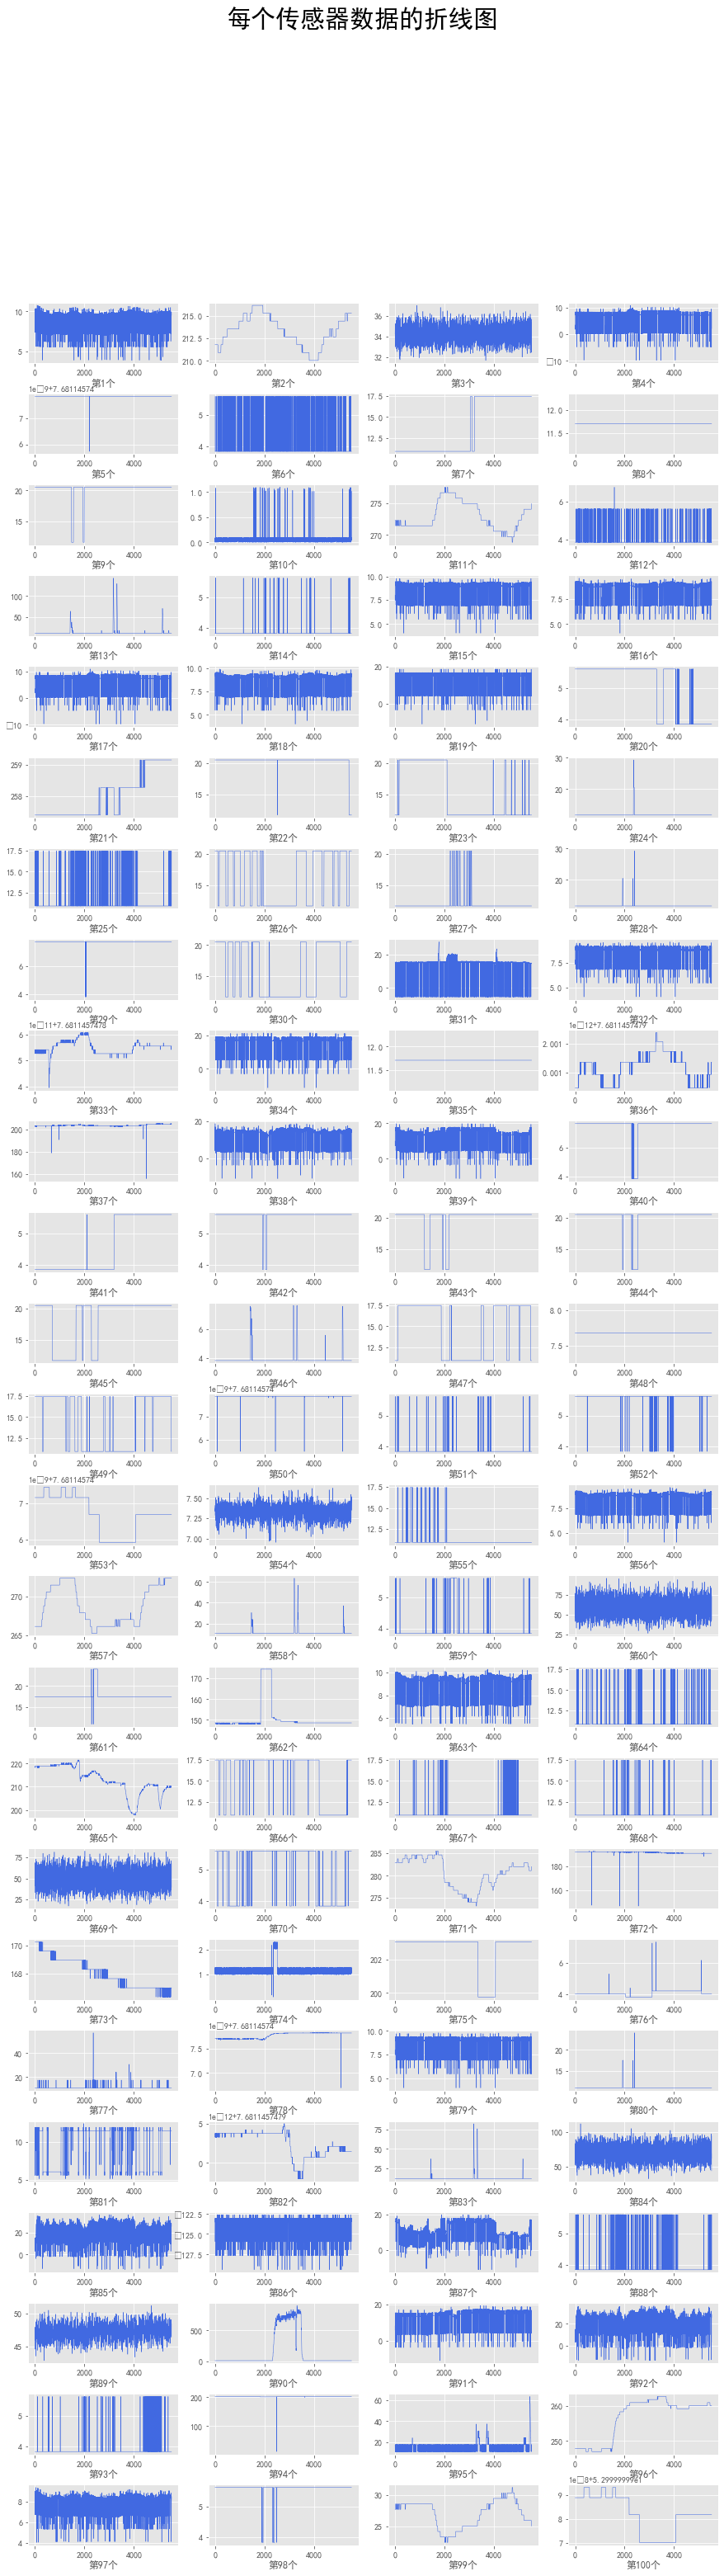

In [220]:
import cv2
# encoding=utf-8
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

x=range(0,5519)
fig = plt.figure(figsize=(15,50))
fig.suptitle("每个传感器数据的折线图",fontsize=30)


for i in range(2,102):
    y=data.iloc[:,i]
    ax = plt.subplot(25,4,i-1)
    plt.subplots_adjust(hspace=0.5)
    #plt.plot(x, y, marker='o', mec='r', mfc='w')#,label=u'y=x^2曲线图')
    plt.plot(x,y,linewidth=0.5,c='royalblue')
    #fig, axes = plt.subplots(1, 1, figsize=(8, 4))
    
    # 折线图, color='#DE6B58'
    #axes.plot(x, y, linestyle='-', marker='x', linewidth=1000)
    
    #plt.legend()  # 让图例生效
    #plt.xticks(x, names, rotation=45)
    #plt.margins(0)
    #plt.subplots_adjust(bottom=0.15)
    
    plt.xlabel(f"第"+str(i-1)+"个")#"时间序列计数") #X轴标签
    #plt.ylabel("取值") #Y轴标签
    #plt.title(" #标题
#plt.show()


In [145]:
# -*- coding: utf-8 -*-
def location_corresponding(x_str, s_str):
    '''
    s 的第三位有效数字，以及对应 x 的相应的数字
    '''
    digit_location = s_str.find('.') 
    if digit_location >= 3:
        # 如果小数点在字符串的第 4 位或大于第四位，也即数字至少在 100 以上
        # 此时第三位有效数字，肯定在小数点前。
        significant_num = s_str[2]
        # 有效位数于小数点的相对位置
        # 0 代表在小数点前， 3-1 是指从小数点前数起的位数
        # sig_loc 的第一位表示有效数字在小数点前，还是后
        # 第二位代表有效数字在小数点的“距离”
        str_len = len(s_str[:digit_location])
        sig_loc = (0, str_len-3-1)
        
    elif s_str[0] == '0':
        # 若整数部分是0，则有效数字的位置在小数点后
        # 刨除整数和小数点部分
        s_without_int = s_str[digit_location:]
        # 若小数点后有 0，则不将 0 计入有效数字位
        if '.0' in s_without_int:
            digit_location += 1
            while '.00' in s_without_int:
                # 若小数点后有多个0，也不计入
                s_without_int = s_without_int.replace('.00', '.0')
                digit_location += 1
        try:
            # 若位数不够，如 0.0，则有效数字为 0、
            significant_num = s_str[digit_location+3]
        except:
            significant_num = '0'
        # 1 表示有效数字在小数点后
        sig_loc = (1, 3)
        
    elif digit_location == -1 and len(s_str) >= 3:
        # 若只有整数，没有小数部分，且整数部分大于 100，即有超过三位数
        # 则直接取第三位
        str_len = len(s_str)
        sig_loc = (0, str_len-3)
        significant_num = s_str[2]
    elif digit_location == -1 and len(s_str) < 3:
        # 若小于 100，则有效数字为0
        significant_num = '0'
    else:
        # 若整数部分小于 2 位，且整数部分大于 0
        sig_loc = (1, 3-digit_location)
        significant_num = s_str[sig_loc[1]+digit_location]
    
    # x 对应的数字 
    x_digit_location = x_str.find('.') 
    if sig_loc[0] == 0:
        if x_digit_location == -1 and len(x_str) >= 3:
            x_significant_num = x_str[2]
        elif x_digit_location == -1 and len(x_str) < 3:
            x_significant_num = '0'
        else:
            x_significant_num = x_str[x_digit_location-sig_loc[1]]
            print(sig_loc[1])
            print('前')
    else:
        try:
            x_significant_num = x_str[x_digit_location+sig_loc[1]]
        except:
            x_significant_num = '0'
            
    return x_significant_num, significant_num

def coverage_critiria(x_list, s_list):
    '''
    收敛准则
    其中 s_list 是一个长度为 3 的 list, 包含当前迭代的 s* 和之前两个迭代的 s*
    其中 x_list 也一样
    
    难点在于：如何找出 s 的第三位有效数字，对应 x 的数位呢？
            这里的解决办法是：找出 s 三位有效数字，在小数点的位置，从而应用于 x 中
    '''

    s_numbers = []
    x_numbers = []
    for i in range(3):
        # 连续两位不变，故需要进行 3 此迭代。
        s = s_list[i]
        # s 的字符串
        s_str = str(s)

        x = x_list[i]
        # x 的字符串
        x_str = str(x) 
        # 找出 s* 的第三位有效数字，和 x* 对应的数字。
        x_sig_num, s_sig_num = location_corresponding(x_str, s_str)
        s_numbers.append(s_sig_num)
        x_numbers.append(x_sig_num)
    
    # 稳健标准差的第三位有效数字，连续两次不变，且稳健平均值的对应数字亦连续两次不变，则判断为收敛
    # 函数返回 True。否则返回 False
    s_equal_flag = (s_numbers[0] == s_numbers[1]) and (s_numbers[0] == s_numbers[2])
    x_equal_flag = (x_numbers[0] == x_numbers[1]) \
                        and (x_numbers[0] == x_numbers[2])
    
    if s_equal_flag and x_equal_flag:
        return True
    else:
        return False
    
def perform_algorithm_A(x):
    '''
    x 是一个向量
    '''
    if type(x) is list:
        x = np.array(x)
    
    # 稳健平均和稳健标准差初始值
    x_star = np.median(x)
    x_diff = np.absolute(x-x_star)
    s_star = 1.483*np.median(x_diff)
    
    # 上界和下界的初始值
    delta = 1.5*s_star
    higher_bound = x_star + delta
    lower_bound =  x_star - delta
    
    x_list = []
    s_list = []
    while True:
        x_tmp = np.copy(x)
        x_tmp[x_tmp>higher_bound] = higher_bound
        x_tmp[x_tmp<lower_bound] = lower_bound
        x_star = np.mean(x_tmp)
        s_star = 1.134*np.std(x_tmp)
        
        x_list.append(x_star)
        s_list.append(s_star)
        
        if len(x_list) == 4:
            x_list.pop(0)
            s_list.pop(0)
            # 达到收敛条件
            if coverage_critiria(x_list, s_list):
                return x_tmp, x_list[2], s_list[2], higher_bound, lower_bound
                

        # 计算上下界
        delta = 1.5*s_star
        higher_bound = x_star + delta
        lower_bound =  x_star - delta

In [146]:
x_star_A=[]
s_star_A=[]
A_risk=[[]for i in range(100)]

#x中取值为上下界的个数几位m，冲击性风险=m/n
for i in range(2,102):
    x=data.iloc[:,i]
    x, xstar, sstar, higherbound, lowerbound = perform_algorithm_A(x)
    x_star_A.append(xstar)
    s_star_A.append(sstar)
    #print(i,": x_star=",xstar,"s_star=",sstar)
    n=len(x)
    m=0
    for j in range(n):
        if x[j]==higherbound or x[j]==lowerbound:
            m+=1
    risk_temp=m/n
    A_risk[i-2].append(i-1)
    A_risk[i-2].append(risk_temp)
    print(A_risk[i-2])

[1, 0.08950896901612611]
[2, 0.06758470737452436]
[3, 0.13408226127921724]
[4, 0.22721507519478165]
[5, 0.19931146946910672]
[6, 0.09512592861025548]
[7, 0.4312375430331582]
[8, 1.0]
[9, 0.023736184091320892]
[10, 0.020655915926798333]
[11, 0.11723138249682914]
[12, 0.05091502083710817]
[13, 0.05037144410219243]
[14, 0.01630730204747237]
[15, 0.23083892009421997]
[16, 0.23899257111795616]
[17, 0.22685269070483782]
[18, 0.228664613154557]
[19, 0.2312013045841638]
[20, 1.0]
[21, 0.48414567856495744]
[22, 0.020112339191882586]
[23, 1.0]
[24, 1.0]
[25, 0.07302047472368182]
[26, 0.45370538140967565]
[27, 1.0]
[28, 1.0]
[29, 0.37126290994745426]
[30, 0.0]
[31, 0.2230476535604276]
[32, 0.2326508425439391]
[33, 0.10907773147309295]
[34, 0.23518753397354594]
[35, 1.0]
[36, 0.0536329045116869]
[37, 0.42254031527450625]
[38, 0.20963942743250588]
[39, 0.16887117231382498]
[40, 1.0]
[41, 0.42145316180467474]
[42, 1.0]
[43, 0.06994020655915927]
[44, 0.04982786736727668]
[45, 0.22902699764450082]
[46

In [147]:
#x=[5,5,2,1,0,0,4,0,1,1]
#print(type(x))
def cal_risk(x,higherbound,lowerbound):
    r=0
    '''for i in range(10):
        n=len(x)
        m=0'''
    n=len(x)
    m=0
    temp=0
    for j in range(n):
        if temp<2:
            temp=0
            total=0
            while j<n:
                #print(x[j])
                if x[j]!=higherbound and x[j]!=lowerbound:
                    break
                elif x[j]==higherbound or x[j]==lowerbound:
                    temp+=1
                j+=1
            if temp!=0:
                #print(temp)
                total=(1+temp)*temp/2
            r+=total
            #print("total:",total)
        elif temp>=2:
            temp-=1
    #print("r:",r)
    return r

#print(cal_risk(x,5,0))

In [88]:
'''x = [927,952,977,995,915,962,966,950,969,949,961,940,1002,956,960,943]
y=[1,1,0,-1,1,-1,-1,-1,1,0]
x, x_star, s_star, higher_bound, lower_bound = perform_algorithm_A(y)
print('算法 A 收敛后，数据变为： ', x)
print('稳健平均值： ', x_star)
print('稳健标准差： ', s_star)
print(higher_bound)
print(lower_bound)
print(cal_risk(x,higherbound,lowerbound))

算法 A 收敛后，数据变为：  [ 1  1  0 -1  1 -1 -1 -1  1  0]
稳健平均值：  0.0
稳健标准差：  1.0142804345939045
1.5214206518908568
-1.5214206518908568
0


In [148]:
#带权重的A_algorithm
A_r=[]
for i in range(2,102):
    x=data.iloc[:,i]
    x, xstar, sstar, higherbound, lowerbound = perform_algorithm_A(x)
    x=x.tolist()
    m=cal_risk(x,higherbound,lowerbound)
    n=len(x)
    A_r.append(m/n)
    print(i-1,":",m/n)
#print(A_r)

1 : 0.14857764087697048
2 : 12.638340279036058
3 : 0.19115781844537053
4 : 0.5144047834752673
5 : 91.14459141148758
6 : 0.12846530168508788
7 : 485.71589055988403
8 : 2760.0
9 : 0.8385577097300235
10 : 0.025548106541040044
11 : 34.84254393911941
12 : 0.06233013227033883
13 : 1.5417648124660264
14 : 0.2134444645769161
15 : 0.5511868092045661
16 : 0.6809204566044573
17 : 0.5133176300054357
18 : 0.5225584344990034
19 : 0.5626019206377967
20 : 2760.0
21 : 406.9492661714079
22 : 0.9769885848885668
23 : 2760.0
24 : 2760.0
25 : 0.11487588331219424
26 : 177.06359847798515
27 : 2760.0
28 : 2760.0
29 : 378.32342815727486
30 : 0.0
31 : 19.271063598477983
32 : 0.5569849610436673
33 : 23.0471099836927
34 : 0.7631817358217068
35 : 2760.0
36 : 7.964486319985505
37 : 149.12937126290996
38 : 0.44500815365102375
39 : 0.31563689074107626
40 : 2760.0
41 : 489.51857220510965
42 : 2760.0
43 : 6.189527088240624
44 : 4.24406595397717
45 : 89.90052545751041
46 : 1.029896720420366
47 : 155.896720420366
48 : 0.0

In [153]:
print(A_r)

[0.14857764087697048, 12.638340279036058, 0.19115781844537053, 0.5144047834752673, 91.14459141148758, 0.12846530168508788, 485.71589055988403, 2760.0, 0.8385577097300235, 0.025548106541040044, 34.84254393911941, 0.06233013227033883, 1.5417648124660264, 0.2134444645769161, 0.5511868092045661, 0.6809204566044573, 0.5133176300054357, 0.5225584344990034, 0.5626019206377967, 2760.0, 406.9492661714079, 0.9769885848885668, 2760.0, 2760.0, 0.11487588331219424, 177.06359847798515, 2760.0, 2760.0, 378.32342815727486, 0.0, 19.271063598477983, 0.5569849610436673, 23.0471099836927, 0.7631817358217068, 2760.0, 7.964486319985505, 149.12937126290996, 0.44500815365102375, 0.31563689074107626, 2760.0, 489.51857220510965, 2760.0, 6.189527088240624, 4.24406595397717, 89.90052545751041, 1.029896720420366, 155.896720420366, 0.0, 108.6638883855771, 0.004892190614241711, 0.01630730204747237, 2760.0, 0.0, 0.20239173763362928, 0.502264903062149, 0.8755209277042942, 0.0, 1.027903605725675, 2.912121761188621, 0.1

In [152]:
'''#sort带权重的A_risk
A_r_dict={}
for i, item in enumerate(A_r):
    A_r_dict[i]=A_r[i]
#print(A_r_dict)

A_r_dict_sort=sorted(A_r_dict.items,key=lambda A_r_dict:A_r_dict[1],reverse=True)
print(A_r_dict_sort)'''
record_A=[]
for i in range(100):
    if A_r[i]>=90 or A_r[i]==0:
        record_A.append(i+1)
print(record_A)

[5, 7, 8, 20, 21, 23, 24, 26, 27, 28, 29, 30, 35, 37, 40, 41, 42, 47, 48, 49, 52, 53, 57, 62, 66, 70, 90, 94, 96, 98, 100]


In [4]:
#带权重的A_algorithm
A_risk=[[]for i in range(100)]

#x中取值为上下界的个数几位m，冲击性风险=m/n
'''
for i in range(2,102):
    x=data.iloc[:,i]
    x, xstar, sstar, higherbound, lowerbound = perform_algorithm_A(x)
    x_star_A.append(xstar)
    s_star_A.append(sstar)
    #print(i,": x_star=",xstar,"s_star=",sstar)
    n=len(x)
    m=0
    for j in range(n):
        if x[j]==higherbound or x[j]==lowerbound:
            m+=1
    risk_temp=m/n
    A_risk[i-2].append(i-1)
    A_risk[i-2].append(risk_temp)
    print(A_risk[i-2])
    
for i in range(2,102):
    x=data.iloc[:,i]
    x, xstar, sstar, higherbound, lowerbound = perform_algorithm_A(x)
    n=len(x)
    m=0
    for j in range(n):
        temp=0
        total=0
        while x[j]==higherbound or x[j]==lowerbound:
            temp+=1
        if temp!=0:
            total=(1+temp)*temp/2
            j+=temp'''

            
for i in range(2,102):
    x=data.iloc[:,i]
    x, xstar, sstar, higherbound, lowerbound = perform_algorithm_A(x)
    n=len(x)
    m=0
    temp=0
    risk=[]
    for j in range(n):
        if temp==0:
            total=0
            while x[j]==higherbound or x[j]==lowerbound:
                temp+=1
            if temp!=0:
                total=(1+temp)*temp/2
            risk[i-2]+=total
        elif temp!=0:
            temp-=1
            
    n=len(x)
    m=0
    temp=0
    for j in range(n):
        if temp<2:
            temp=0
            total=0
            while j<n:
                #print(x[j])
                if x[j]==0:
                    break
                elif x[j]==1:
                    temp+=1
                j+=1
            if temp!=0:
                print(temp)
                total=(1+temp)*temp/2
            r+=total
            print("total:",total)
        elif temp>=2:
            temp-=1

SyntaxError: invalid syntax (<ipython-input-4-e31ca1dcbbd0>, line 42)

In [94]:
A_lists=[[]for i in range(100)]
for i in range(2,102):
    A_lists[i-2].append(i-1)
    A_lists[i-2].append(x_star_A[i-2])
    A_lists[i-2].append(s_star_A[i-2])
    
print(A_lists[0])

[1, 8.700352960821924, 1.2196242610275876]


In [95]:
'''A_df=pd.DataFrame(A_lists,columns=['num','x_star','s_star'])
print(A_df)
A_df.sort_values(by="x_star")
print(A_df)

    num      x_star        s_star
0     1    8.700353  1.219624e+00
1     2  213.345086  1.886447e+00
2     3   34.323504  7.686183e-01
3     4    6.491101  2.157173e+00
4     5    7.681146  5.401514e-13
..  ...         ...           ...
95   96  256.595705  6.657558e+00
96   97    7.730668  9.028956e-01
97   98    5.615367  0.000000e+00
98   99   27.099493  2.435056e+00
99  100   53.000000  9.106484e-09

[100 rows x 3 columns]
    num      x_star        s_star
0     1    8.700353  1.219624e+00
1     2  213.345086  1.886447e+00
2     3   34.323504  7.686183e-01
3     4    6.491101  2.157173e+00
4     5    7.681146  5.401514e-13
..  ...         ...           ...
95   96  256.595705  6.657558e+00
96   97    7.730668  9.028956e-01
97   98    5.615367  0.000000e+00
98   99   27.099493  2.435056e+00
99  100   53.000000  9.106484e-09

[100 rows x 3 columns]


In [3]:
def pearson_corrlation(object1, object2):
    values = range(len(object1))
    
    # Summation over all attributes for both objects
    sum_object1 = sum([float(object1[i]) for i in values]) 
    sum_object2 = sum([float(object2[i]) for i in values])

    # Sum the squares
    square_sum1 = sum([pow(object1[i],2) for i in values])
    square_sum2 = sum([pow(object2[i],2) for i in values])

    # Add up the products
    product = sum([object1[i]*object2[i] for i in values])

    #Calculate Pearson Correlation score
    numerator = product - (sum_object1*sum_object2/len(object1))
    denominator = ((square_sum1 - pow(sum_object1,2)/len(object1)) * (square_sum2 - 
    	pow(sum_object2,2)/len(object1))) ** 0.5
        
    # Can"t have division by 0
    if denominator == 0:
        return 0

    result = numerator/denominator
    return result

In [4]:
#风险信号的联动性和持续性，通过自相关系数进行判断
#自相关系数：当前时刻和其前k个时刻的Pearson相关系数计算公式
def get_auto_corr(timeSeries,k):
    '''
    Descr:输入：时间序列timeSeries，滞后阶数k
            输出：时间序列timeSeries的k阶自相关系数
        l：序列timeSeries的长度
        timeSeries1，timeSeries2:拆分序列1，拆分序列2
        timeSeries_mean:序列timeSeries的均值
        timeSeries_var:序列timeSeries的每一项减去均值的平方的和
    '''
    l = len(timeSeries)
    #取出要计算的两个数组
    timeSeries1 = timeSeries[0:l-k]
    timeSeries2 = timeSeries[k:]
    timeSeries_mean = timeSeries.mean()
    timeSeries_var = np.array([i**2 for i in timeSeries-timeSeries_mean]).sum()
    auto_corr = 0
    for i in range(l-k):
        temp = (timeSeries1[i]-timeSeries_mean)*(timeSeries2[i]-timeSeries_mean)/timeSeries_var
        auto_corr = auto_corr + temp  
    return auto_corr

def pearson(current_num,sensor,k):
    x = data.iloc[:,sensor+1]#选中相关传感器的那列
    #print(type(x))
    timeSeries = x[0:current_num]#选中该时刻及之前的时间序列
    #print(timeSeries)
    timeSeries=timeSeries.values
    corr = get_auto_corr(timeSeries,k)
    return corr
'''current_num可以从0开始，sensor只能是1-100'''

In [30]:
print(pearson(5514,100,1))

0.9993174834377079


In [116]:
x=np.array([1,1,1,9,1,1])
print(type(x))
#print(get_auto_corr(x,2))
x=data.iloc[:,8]
print(x)
x=x.values
print(type(x))
print(get_auto_corr(x,8))

<class 'numpy.ndarray'>
0       10.908712
1       10.908712
2       10.908712
3       10.908712
4       10.908712
          ...    
5514    17.466151
5515    17.466151
5516    17.466151
5517    17.466151
5518    17.466151
Name: 7, Length: 5519, dtype: float64
<class 'numpy.ndarray'>
0.9896296841819887


In [5]:
#print(pearson(5519,7,8))
selfcorr_list_8=[]
selfcorr_list_4=[]
for i in range(100):
    temp1=pearson(5519,i+1,8)
    selfcorr_list_8.append(temp1)
    temp2=pearson(5519,i+1,4)
    selfcorr_list_4.append(temp2)
print(selfcorr_list_8)

[-0.018362152541581737, 0.9933545320131149, -0.003475514944447142, -0.0032212707273227264, 0.000268026845302175, -0.01265843923190127, 0.9896296841819887, nan, 0.8844055187642452, 0.09208141349666507, 0.9944619917093638, 0.02853442282917635, 0.8052329395422303, 0.457801229492953, -0.01036387658422608, 0.03274116266221031, -0.0036657192597107343, 0.03746177532516233, 0.035172851236608745, 0.9552868127502067, 0.9762053627236993, 0.8809555641480062, 0.9499770796375182, 0.7144866319802802, 0.15478156495821346, 0.9309766391578645, 0.6850618849902522, 0.39623591565391403, -0.001089914243902229, 0.9524035692669316, 0.07009413645340686, -0.01448845611320116, 0.9634967883858836, 0.034965701007805564, nan, 0.968554664260646, 0.2239696435971827, 0.011148030805887396, 0.024063307846594648, 0.8876258747844661, 0.9940184608965171, 0.777864551618204, 0.9395476835733827, 0.9168358631609134, 0.9776984575521978, 0.8457361505583699, 0.9602803882717551, 0.9985504620402874, 0.9251671788182719, -0.000910452

<ipython-input-4-1fe6f33382cd>:20: RuntimeWarning: invalid value encountered in double_scalars
  temp = (timeSeries1[i]-timeSeries_mean)*(timeSeries2[i]-timeSeries_mean)/timeSeries_var


In [6]:
selfcorr_df_8=pd.DataFrame(selfcorr_list_8,columns=['corrlation'])
selfcorr_df_4=pd.DataFrame(selfcorr_list_4,columns=['corrlation'])
#selfcorr_df_8.iloc[0,1]='1'
#selfcorr_df_4.iloc[0,1]='1'
#print(selfcorr_df_8)
for i in range(100):
    selfcorr_df_8.loc[i,'sensor_num']=str(i+1)
    selfcorr_df_4.loc[i,'sensor_num']=str(i+1)
    #去除平滑情况
    '''if i+1==8 or i+1==35 or i+1==48:
        selfcorr_df_8.drop(str(i),axis=0)
        selfcorr_df_4.drop(str(i),axis=0)'''
#print(selfcorr_df_8)
selfcorr_df_8=selfcorr_df_8.sort_values(by=['corrlation','sensor_num'],ascending=[False,True])
selfcorr_df_4=selfcorr_df_4.sort_values(by=['corrlation','sensor_num'],ascending=[False,True])

print("k=8:\n",selfcorr_df_8)
print("\nk=4:\n",selfcorr_df_4)

k=8:
     corrlation sensor_num
47    0.998550         48
95    0.997586         96
64    0.997018         65
70    0.996419         71
56    0.995200         57
..         ...        ...
31   -0.014488         32
85   -0.017684         86
0    -0.018362          1
34         NaN         35
7          NaN          8

[100 rows x 2 columns]

k=4:
     corrlation sensor_num
47    0.999275         48
95    0.998838         96
70    0.998502         71
64    0.998326         65
56    0.997836         57
..         ...        ...
51   -0.012112         52
83   -0.015181         84
68   -0.019685         69
34         NaN         35
7          NaN          8

[100 rows x 2 columns]


In [7]:
#画各阶自相关系数的图
import cv2
# encoding=utf-8
from pylab import *  
def plot_auto_corr(t,timeSeries,k):
    '''
    Descr:需要计算自相关函数get_auto_corr(timeSeries,k)
            输入时间序列timeSeries和想绘制的阶数k，k不能超过timeSeries的长度
            输出：k阶自相关系数图，用于判断平稳性
    '''
    #支持中文
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    timeSeriestimeSeries = pd.DataFrame(range(k))
    for i in range(1,k+1):
        timeSeriestimeSeries.loc[i-1] =get_auto_corr(timeSeries,i)
    plt.bar(range(1,len(timeSeriestimeSeries)+1),timeSeriestimeSeries[0])
    plt.title("传感器"+str(t)+"在k="+str(k)+"时的自相关关系",fontsize=30)
    plt.ylabel("自相关系数取值",fontsize=20)
    return timeSeriestimeSeries

k = 8:



,0
0,0.567378
1,0.067739
2,-0.147217
3,-0.007969
4,0.011595
5,0.035586
6,0.019199
7,-0.003666
8,-0.017115
9,-0.006300


D:\Software\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Software\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


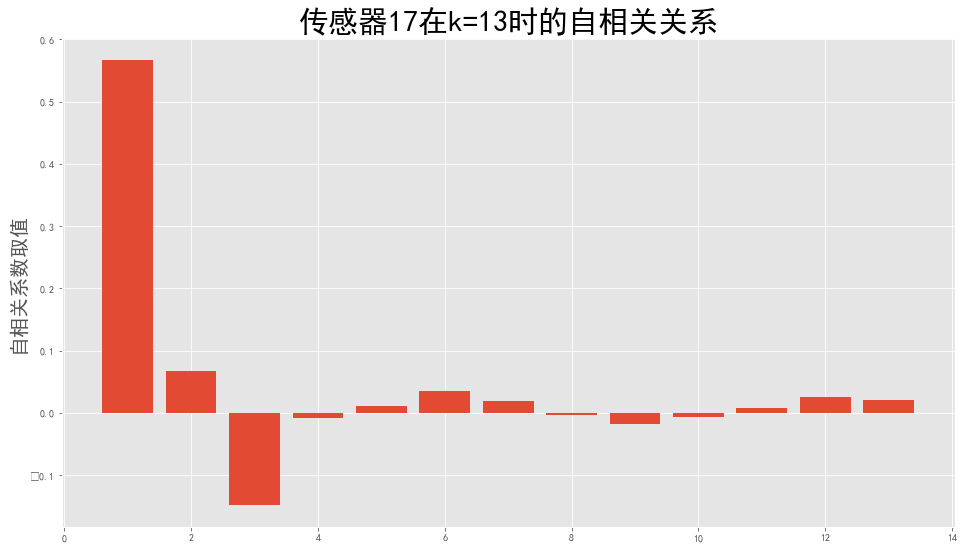

In [156]:
sensor=17 #sensor定位（1-100）
x = data.iloc[:,sensor+1]#选中实际输入-1的那列传感器数据，e.g.输入48，选中的是第47个传感器
#print(x)
timeS = x[0:5519]#选中该时刻及之前的时间序列
#print(timeSeries)
timeS=timeS.values
print("k = 8:\n")
plot_auto_corr(sensor,timeS,13)

In [157]:
# 导入数据集
Q2_2 = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\培训题1\\score2.csv')
print(Q2_2)

          Time         1         2         3         4         5         6  \
0      0:00:15  0.030406  0.037588  0.497068  0.040608  0.406935  0.188760   
1      0:00:30  0.007532  0.009994  0.318058  0.168683  0.241701  0.086031   
2      0:00:45  0.001866  0.002657  0.201671  0.382269  0.142773  0.039184   
3      0:01:00  0.035337  0.002657  0.030099  0.758248  0.142773  0.039184   
4      0:01:15  0.299678  0.002657  0.015696  0.260879  0.142773  0.039184   
...        ...       ...       ...       ...       ...       ...       ...   
5514  22:58:45  0.094967  0.000968  0.553884  0.048659  0.125177  0.039184   
5515  22:59:00  0.006997  0.000968  0.091783  0.365351  0.125177  0.039184   
5516  22:59:15  0.006997  0.000968  0.553884  0.365351  0.125177  0.039184   
5517  22:59:30  0.021685  0.004456  0.259223  0.832272  0.217645  0.086031   
5518  22:59:45  0.067199  0.020509  0.400799  0.577693  0.376720  0.188760   

             7  8         9  ...        91        92        93 

In [50]:
#第二问
Q2_3=Q2_2#5519*101
#print(Q2_3)
for i in range(100):
    for j in range(5519):
        temp=pearson(j+1,i+1,5)
        #5519*100，定位到第j行第i列，修改数字
        Q2_3.loc[j,str(i+1)]=temp                                                                                                                                                                                                                                                     
#index=False,header=False表示不保存行索引和列标题
save.to_csv('C:\\Users\\Lenovo\\Desktop\\培训题1\\score3.csv',index=False,header=False)  

<ipython-input-4-1fe6f33382cd>:20: RuntimeWarning: invalid value encountered in double_scalars
  temp = (timeSeries1[i]-timeSeries_mean)*(timeSeries2[i]-timeSeries_mean)/timeSeries_var


AttributeError: 'function' object has no attribute 'to_csv'

In [57]:
print(type(Q2_3))
print('\n',Q2_3)
Q2_3_save=Q2_3
Q2_3_save.to_csv('C:\\Users\\Lenovo\\Desktop\\培训题1\\score3.csv') 

<class 'pandas.core.frame.DataFrame'>

           Time         1         2         3         4         5         6  \
0      0:00:15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0:00:30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0:00:45  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0:01:00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0:01:15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
5514  22:58:45 -0.011148  0.996228  0.024480  0.011627  0.000267 -0.010573   
5515  22:59:00 -0.011219  0.996229  0.024446  0.011499  0.000268 -0.010554   
5516  22:59:15 -0.011356  0.996230  0.024167  0.011611  0.000269 -0.010535   
5517  22:59:30 -0.011427  0.996231  0.023804  0.011485  0.000269 -0.010516   
5518  22:59:45 -0.011244  0.996232  0.023395  0.012351  0.000270 -0.010496   

             7         

In [81]:
Q2_3_save.to_csv('C:\\Users\\Lenovo\\Desktop\\培训题1\\score3.csv') 

In [110]:
Q2_3=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\培训题1\\score3.csv')
print(Q2_3)

          Time             1             2             3             4  \
0      0:00:15  1.000000e-08  1.000000e-08  1.000000e-08  1.000000e-08   
1      0:00:30  1.000000e-08  1.000000e-08  1.000000e-08  1.000000e-08   
2      0:00:45  1.000000e-08  1.000000e-08  1.000000e-08  1.000000e-08   
3      0:01:00  1.000000e-08  1.000000e-08  1.000000e-08  1.000000e-08   
4      0:01:15  1.000000e-08  1.000000e-08  1.000000e-08  1.000000e-08   
...        ...           ...           ...           ...           ...   
5514  22:58:45 -1.114752e-01  9.962283e-01  2.447988e-01  1.162693e-01   
5515  22:59:00 -1.121961e-01  9.962293e-01  2.444564e-01  1.149881e-01   
5516  22:59:15 -1.135585e-01  9.962322e-01  2.416659e-01  1.161114e-01   
5517  22:59:30 -1.142729e-01  9.962312e-01  2.383720e-01  1.148568e-01   
5518  22:59:45 -1.124436e-01  9.962322e-01  2.339522e-01  1.235751e-01   

                 5             6             7             8             9  \
0     1.000000e-08  1.000000e-08 

In [111]:
#以30min为周期，行数为以下
time_rownum=[119,239,359,479,599,719,839,959,1079,1199,1319,1439,
          1559,1679,1799,1919,2039,2159,2279,2399,2519,2639,2759,
         2879,2999,3119,3239,3359,3479,3599,3719,3839,3959,4079,
          4199,4319,4439,4559,4679,4799,4919,5039,5159,5279,5399]
#time_row=['00:30:00',]

In [119]:
Q2_risk = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\培训题1\\Q2_risk.csv')
Q2_3_30=Q2_risk
Q2_2_30=Q2_risk
for i in range(len(time_rownum)):
    m=time_rownum[i]
    temp2=Q2_2.loc[m]
    Q2_2_30.loc[Q2_2_30.index.max()+1]=temp2
    temp3=Q2_3.loc[m]
    Q2_3_30.loc[Q2_3_30.index.max()+1]=temp3
    #2
    Q2_2_30=Q2_2_30.reset_index()
    Q2_2_30.drop(columns=['index'],inplace=True)
    #3
    Q2_3_30=Q2_3_30.reset_index()
    Q2_3_30.drop(columns=['index'],inplace=True)

In [196]:
#加权重
#Q2.loc[1,100]=Q2_2_30.loc[1,100]+Q2_3_30.loc[1,100]
#Q2.loc[0]=Q2_2_30.loc[0]
Q2=10*Q2_2_30+40*Q2_3_30
Q2['Time']=Q2_2_30['Time']
print(20*Q2_3_30)#45*101

                                                 Time          1          2  \
0   0:30:000:30:000:30:000:30:000:30:000:30:000:30...  -2.750232  -2.545494   
1   1:00:001:00:001:00:001:00:001:00:001:00:001:00...  -2.987951  18.447171   
2   1:30:001:30:001:30:001:30:001:30:001:30:001:30...  -9.132690  18.870564   
3   2:00:002:00:002:00:002:00:002:00:002:00:002:00...  -7.243558  19.492333   
4   2:30:002:30:002:30:002:30:002:30:002:30:002:30...  -9.718670  19.544858   
5   3:00:003:00:003:00:003:00:003:00:003:00:003:00...  -3.738420  19.698383   
6   3:30:003:30:003:30:003:30:003:30:003:30:003:30...  -3.885134  19.755842   
7   4:00:004:00:004:00:004:00:004:00:004:00:004:00...  -2.758686  19.783833   
8   4:30:004:30:004:30:004:30:004:30:004:30:004:30...  10.842000  19.729267   
9   5:00:005:00:005:00:005:00:005:00:005:00:005:00...  -2.525658  19.693623   
10  5:30:005:30:005:30:005:30:005:30:005:30:005:30...  -2.979000  19.823665   
11  6:00:006:00:006:00:006:00:006:00:006:00:006:00..

In [197]:
#计算每个时刻之和
Q2['total']=''
for i in range(45):
    temp=0
    for j in range(1,101):
        temp+=Q2.loc[i,str(j)]
    Q2.loc[i,'total']=temp
print(Q2)

            1         10        100         11         12         13  \
0   -6.875580   7.944500  47.916667  25.668797 -17.959770 -50.000000   
1   -5.189924   8.770087  39.195618  23.721991  34.106459 -39.194000   
2  -11.480558   7.168345  14.991620  27.900323  21.921424  40.250444   
3   -8.763139  10.317633  38.290155  28.782803  32.185475 -39.194000   
4  -19.276822   7.826505  38.408840  28.962431  23.138867  40.472666   
5   -2.030793  19.203565  38.614327  29.437996  23.078626  40.548222   
6   -0.985447  43.242738  38.733460  29.748203  21.286521 -39.194000   
7   -5.449756  10.069908  38.810523  29.966556  17.017074 -39.194000   
8   27.958340   8.255928  38.129128  30.128025  15.402320 -39.194000   
9   -3.342104   9.594962  38.614773  30.255068  30.350702  40.639333   
10   0.139757   9.432053  38.563661  30.351610  23.119755  40.654484   
11   4.664234  13.012084  38.615090  30.431991  17.634825  35.136456   
12  13.381976 -28.718302  38.282888  34.686830  10.574367  38.49

In [198]:
#for i in range(100):
#    Q2.loc[i,'sensor_num']=str(i+1)
    #去除平滑情况
#    '''if i+1==8 or i+1==35 or i+1==48:
#        selfcorr_df_8.drop(str(i),axis=0)
#        selfcorr_df_4.drop(str(i),axis=0)'''
#print(selfcorr_df_8)
Q2=Q2.sort_values(by=['total','Time'],ascending=[False,True])

print("第二问风险时刻排序:\n",Q2)

第二问风险时刻排序:
             1         10        100         11         12         13  \
34  14.879359  36.479442  41.425097  39.862845  12.275595  37.351959   
36 -13.941444  36.048495  41.424976  39.871751  15.872155  37.357659   
28   9.944566   7.913043  39.803512  40.364555  11.994829  37.364965   
33  -3.056745  37.180270  41.425237  39.851739  12.145420  37.348847   
43   0.545920  35.885663  41.424904  40.055709   9.671859  37.285906   
31  11.895154  38.522749  39.848843  39.924810  13.644398  37.343116   
26  15.203831   7.076764  39.746083  39.925384   9.934435  37.980079   
41 -26.923851  37.372908  41.424922  40.385485   9.877843  37.365989   
35  17.492163  36.701643  41.424989  39.844563  12.523815  37.354892   
30  31.930711  10.500987  39.836976  39.926603  11.273811  37.340462   
32 -14.062963  37.200989  39.858566  39.927444  11.734259  37.345537   
38 -14.216938  37.110843  41.424968  39.853486  11.690430  37.359275   
39 -18.660156  36.054492  41.424942  39.861021  14.8

In [ ]:
'''Q2_risk = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\培训题1\\Q2_risk.csv')
Q2_risk.loc[Q2_risk.index.max()+1]=b
Q2_risk=Q2_risk.reset_index()
Q2_risk.drop(columns=['index'],inplace=True)
print(Q2_risk)

In [135]:
'''#计算每个时刻之和
Q3try=Q2_3
Q3try['total']=''
for i in range(45):
    temp=0
    for j in range(1,101):
        temp+=Q3try.loc[i,str(j)]
    Q3try.loc[i,'total']=temp
Q3try=Q3try.sort_values(by=['total','Time'],ascending=[False,True])
print(Q3try)

        Time         1         2         3         4         5         6  \
36  18:30:00 -0.358867  0.997367  0.377659  0.139682 -0.188885 -0.111665   
34  17:30:00  0.253717  0.996379  0.273735  0.495274 -0.194460 -0.115860   
28  14:30:00  0.134332  0.993649  0.326244  0.145863 -0.234615 -0.653500   
33  17:00:00 -0.194686  0.995159  0.282731  0.544764 -0.278100 -0.192390   
43  22:00:00 -0.116741  0.996176  0.243715  0.792336  0.165350 -0.115569   
41  21:00:00 -0.674530  0.996633  0.262394  0.893784  0.120000 -0.142886   
31  16:00:00  0.271920  0.993873  0.253814  0.131216 -0.217197 -0.112226   
35  18:00:00  0.258933  0.997989  0.282354  0.119748 -0.193400 -0.172676   
26  13:30:00  0.141828  0.993729  0.289810  0.119547 -0.266960 -0.256229   
30  15:30:00  0.754436  0.993662  0.292392  0.132689 -0.221200 -0.132614   
32  16:30:00 -0.458750  0.994237  0.265783  0.167693 -0.212913 -0.915111   
38  19:30:00 -0.358316  0.997295  0.268578  0.149699 -0.153330 -0.141775   
39  20:00:00

In [174]:
'''a=Q2.iloc[0,0:100]
a=a.values
print(type(a))
print(a)

<class 'numpy.ndarray'>
[28.72780505 32.0391757 27.73880915 19.98818653 8.85883445 22.30297814
 15.55774121 34.916889350000005 23.16030995 48.28600655 22.805484749999998
 24.723982550000002 19.948900409999997 18.69249379 20.85507773 9.00324374
 19.9731862 22.72976918 5.135900750000001 19.39591576 19.38511133
 18.46383591 10.490846580000001 43.792078000000004 19.4115791
 19.051009699999998 31.75368985 19.83255097 19.5904242 19.977904799999997
 20.79693565 7.40697475 7.4159839000000005 40.21048605 49.34433065
 22.67783535 19.893232200000003 22.382150250000002 21.78051415 22.10969404
 20.38914785 22.0923159 19.8245819 -19.9156745 19.10925595
 4.0946582000000005 4.87206715 21.9244771 2.3429665500000008
 27.738846799999997 -2.58786895 15.33370299 19.303652800000002 20.01913584
 22.71467525 18.539726899999998 -0.35801804999999964 17.324787850000003
 22.363973950000002 21.88004781 12.641350499999998 11.986473750000002
 19.96452079 17.59393975 7.6555714 14.3018489 15.866105899999997
 19.819246

In [175]:
a=pd.DataFrame(a,columns=['risk'])
#print(a)
#selfcorr_df_8.iloc[0,1]='1'
#selfcorr_df_4.iloc[0,1]='1'
#print(selfcorr_df_8)
for i in range(100):
    a.loc[i,'sensor_num']=str(i+1)
    #去除平滑情况
    '''if i+1==8 or i+1==35 or i+1==48:
        selfcorr_df_8.drop(str(i),axis=0)
        selfcorr_df_4.drop(str(i),axis=0)'''
#print(selfcorr_df_8)
a=a.sort_values(by=['risk','sensor_num'],ascending=[False,True])
print("Risk:\n",a)

Risk:
         risk sensor_num
72   55.8998         73
84   55.8752         85
34   49.3443         35
9     48.286         10
23   43.7921         24
..       ...        ...
45   4.09466         46
48   2.34297         49
56 -0.358018         57
50  -2.58787         51
43  -19.9157         44

[100 rows x 2 columns]


In [200]:
Q2_origin=Q2
print(type(Q2))
Q2_origin.to_csv('C:\\Users\\Lenovo\\Desktop\\培训题1\\risk.csv') 
#Q2=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\培训题1\\risk.csv')
print(Q2)

<class 'pandas.core.frame.DataFrame'>
            1         10        100         11         12         13  \
34  14.879359  36.479442  41.425097  39.862845  12.275595  37.351959   
36 -13.941444  36.048495  41.424976  39.871751  15.872155  37.357659   
28   9.944566   7.913043  39.803512  40.364555  11.994829  37.364965   
33  -3.056745  37.180270  41.425237  39.851739  12.145420  37.348847   
43   0.545920  35.885663  41.424904  40.055709   9.671859  37.285906   
31  11.895154  38.522749  39.848843  39.924810  13.644398  37.343116   
26  15.203831   7.076764  39.746083  39.925384   9.934435  37.980079   
41 -26.923851  37.372908  41.424922  40.385485   9.877843  37.365989   
35  17.492163  36.701643  41.424989  39.844563  12.523815  37.354892   
30  31.930711  10.500987  39.836976  39.926603  11.273811  37.340462   
32 -14.062963  37.200989  39.858566  39.927444  11.734259  37.345537   
38 -14.216938  37.110843  41.424968  39.853486  11.690430  37.359275   
39 -18.660156  36.054492  

In [191]:
'''Q2_a=Q2.sort_values(by=0,ascending=False,inplace=True)#,axis=1
print(Q2_a)

KeyError: 0